<a href="https://colab.research.google.com/github/achanhon/coursdeeplearningcolab/blob/master/illustration_cours_ensta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### COURS INTRODUCTION AU DEEP LEARNING (ENSTA)

Dans un premier temps, l'objectif est d'insister entre la différence entre une architecture de réseau de neurones (qui peut coder différentes fonctions via les valeurs d'un ensemble de poids).

Considérons par exemple un réseau de neurones sur des points 2D fait de 3 neurones en couche caché et 1 neurone terminal.

In [ ]:
import torch

class LittleNet(torch.nn.Module):
    def __init__(self):
        super(LittleNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, 3, bias=False)
        self.fc2 = torch.nn.Linear(3, 1, bias=False)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

donnons lui une initialisation arbitraire, et regardons le signe de la fonction correspondante dans le plan

torch.Size([100, 2])


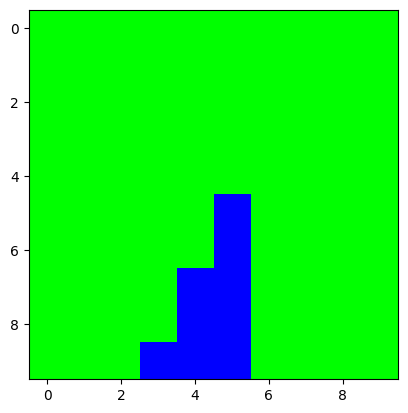

In [ ]:
import matplotlib.pyplot as plt
grid = []
for i in range(-5,5):
  for j in range(-5,5):
    grid.append(torch.Tensor([i,j]))
grid = torch.stack(grid).long()
print(grid.shape)

net = LittleNet()
output = net(grid.float())

visu = torch.zeros(10,10,3)
for k in range(grid.shape[0]):
  if output[k]>0:
    visu[grid[k][0]+5][grid[k][1]+5][1]=1
  else:
    visu[grid[k][0]+5][grid[k][1]+5][2]=1

plt.imshow(visu.numpy())
plt.show()

-----
l'objectif de la suite est d'illustrer le concepte de différentiation automatique implémenté dans pytorch, indépendamment d'un réseau de neurones.
-----

imaginons qu'on ait une fonction bizarre


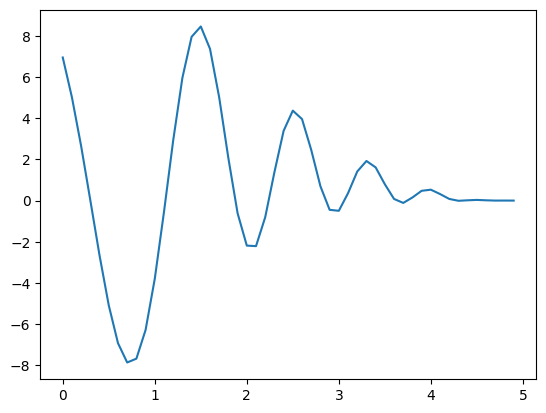

In [41]:
import torch
import matplotlib.pyplot as plt
import math

def f(x):
  return (1+ torch.sin(x)) * (1 + torch.cos((x+1)*(x+1)) * (1+10*torch.exp(-x)))

with torch.no_grad():
  x = torch.Tensor([0.1*i for i in range(50)])
  plt.plot(x.numpy(), f(x).numpy())

et qu'on veuille l'approximer sur [0,5] avec un polynome de degrée 6

21.554529190063477 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 17.992013931274414
11.124972343444824 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 28.862499237060547
12.158788681030273 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 11.739801406860352
16.293109893798828 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 6.4996867179870605
13.529258728027344 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 11.260393142700195
5.523180961608887 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 24.063796997070312
24.985815048217773 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 8.309206008911133
22.442142486572266 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 18.557466506958008
9.524762153625488 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 29.434200286865234
2.9150259494781494 [-0.36354446 -0.471592   -0.19262946  0.40363514 -0.34476334] 9.312417984008789
21.8

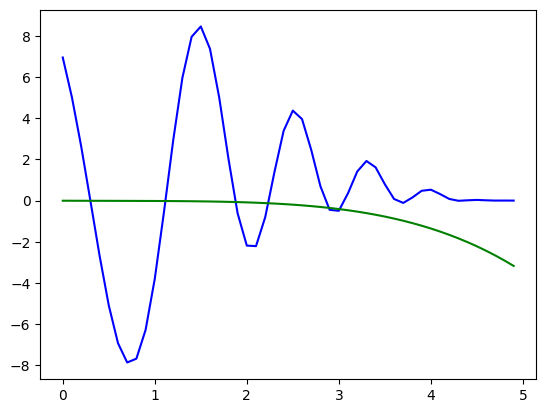

In [57]:
def poly(coef,x):
  xP = torch.pow(x.unsqueeze(1), torch.arange(coef.shape[0], dtype=torch.float32))
  return (coef.unsqueeze(0) * xP).mean(1)/10

coef = torch.rand(5)-0.5
coef = coef.requires_grad_()
optimizer = torch.optim.SGD([coef],lr = 0.1,momentum=0.1)
for i in range(1000):
  x = torch.rand(7)*5 # sample 7 x in [0,5]
  currentloss = ((f(x)-poly(coef,x))**2).mean() # mse loss between f and current approximation
  optimizer.zero_grad()
  currentloss.backward()
  optimizer.step
  if i%99==0:
    print(float(coef.grad.abs().sum()),coef.detach().numpy(),float(currentloss))

with torch.no_grad():
  x = torch.Tensor([0.1*i for i in range(50)])
  plt.plot(x.numpy(),f(x).numpy(), color='blue')
  plt.plot(x.numpy(),poly(coef,x).numpy(), color='green')
  plt.show

2.723299264907837
9.763472557067871
2.905224323272705
8.003666877746582
12.57349681854248
10.640454292297363
19.743061065673828
22.045541763305664
8.814821243286133
10.735921859741211
7.930309772491455


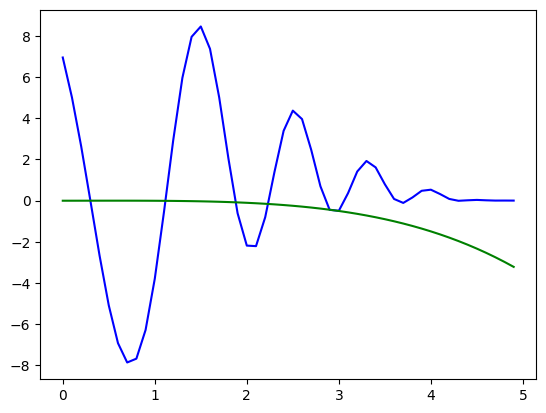

In [44]:
for i in range(1000):
  x = torch.rand(7)*5 # sample 7 x in [0,5]
  currentloss = ((f(x)-poly(coef,x))**2).mean() # mse loss between f and current approximation
  optimizer.zero_grad()
  currentloss.backward()
  optimizer.step
  if i%99==0:
    print(coef.numpy(),float(currentloss))

with torch.no_grad():
  x = torch.Tensor([0.1*i for i in range(50)])
  plt.plot(x.numpy(),f(x).numpy(), color='blue')
  plt.plot(x.numpy(),poly(coef,x).numpy(), color='green')
  plt.show